# Ajuste de Datos y el Método de Mínimos Cuadrados.

## 1. Introducción

<br>
Objetivo: Introducir el concepto de ajuste de datos y el método de mínimos cuadrados.

---

### 1.1 Por Qué el Ajuste de Datos es Importante

El **ajuste de datos** es el proceso de construir una función o modelo que represente mejor un conjunto de puntos de datos observados. Esto es crucial en ingeniería y ciencia por varias razones:

- **Modelado Predictivo**: Permite hacer predicciones sobre eventos futuros basados en datos actuales.
- **Estimación de Parámetros**: Ayuda a determinar los parámetros subyacentes que gobiernan un sistema o proceso.
- **Análisis de Datos**: Facilita la comprensión de las relaciones entre variables, el descubrimiento de tendencias y la prueba de hipótesis.

**Escenarios Comunes**:

- **Análisis de Datos Experimentales**: Ajustar curvas a datos experimentales para encontrar tendencias o validar modelos teóricos.
- **Procesamiento de Señales**: Filtrar el ruido de las señales para extraer información significativa.
- **Machine Learning/Aprendizaje Automático**: Forma la base de los algoritmos de regresión utilizados para predicciones.

**Aplicaciones en el Mundo Real**:

- **Ingeniería**: Diseñar sistemas modelando relaciones tensión-deformación en materiales.
- **Física**: Determinar la trayectoria de objetos en movimiento.
- **Economía**: Prever tendencias del mercado e indicadores económicos.
- **Medicina**: Analizar relaciones dosis-respuesta en farmacología.

### 1.2 Introducción a los Mínimos Cuadrados

El **método de mínimos cuadrados** es un enfoque estándar en análisis de regresión para aproximar la solución de sistemas sobredeterminados (más ecuaciones que incógnitas). Minimiza la suma de los cuadrados de los residuos—las diferencias entre los valores observados y calculados.

**¿Por Qué Mínimos Cuadrados?**

- **Optimalidad**: Proporciona el mejor estimador lineal insesgado bajo ciertas condiciones (teorema de Gauss-Markov).
- **Simplicidad**: Ofrece un enfoque computacional directo.
- **Versatilidad**: Aplicable a modelos lineales y no lineales, así como a conjuntos de datos complejos.

### Ilustración Visual


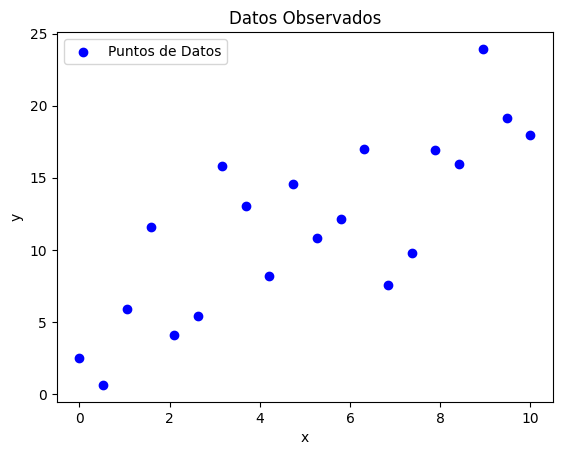

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(42)
x = np.linspace(0, 10, 20)
y = 2.5 * x + np.random.normal(0, 5, size=x.shape)

# Graficar los datos
plt.scatter(x, y, color='blue', label='Puntos de Datos')
plt.title('Datos Observados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Ejemplo con pandas

También es posible importar datos para su análisis en Python. Un formato común para datos es el CSV, o valores separados por comas, y para trabajar con este tipo de archivo podemos usar el módulo `pandas`. En este ejemplo, utilizaremos datos de [Kaggle](https://www.kaggle.com/datasets/man526/watermelon-price-prediction-from-weight/data).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos/melon.csv")

df.head()

,Weight,Price
0,1,50
1,2,100
2,3,140
3,4,180
4,5,220


In [5]:
df.describe()

,Weight,Price
count,10.00000,10.000000
mean,5.50000,235.000000
std,3.02765,117.968922
min,1.00000,50.000000
25%,3.25000,150.000000
50%,5.50000,235.000000
75%,7.75000,330.000000
max,10.00000,390.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  10 non-null     int64
 1   Price   10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


Información adicional: [pandas](https://pandas.pydata.org/docs/user_guide/index.html)

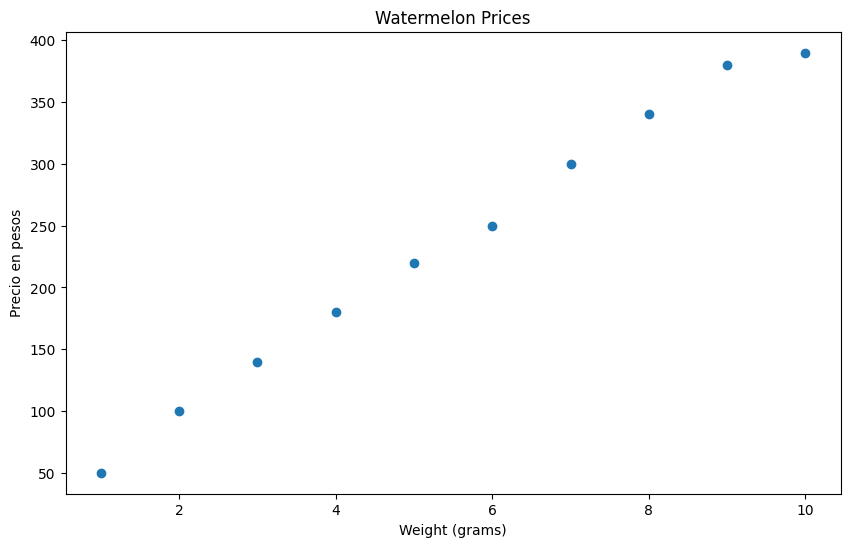

In [2]:
plt.figure(figsize = (10,6))
plt.scatter(df['Weight'], df['Price'])
plt.title('Watermelon Prices')
plt.xlabel('Weight (grams)')
plt.ylabel('Precio en pesos')
plt.show()

## 2. Entendiendo los Mínimos Cuadrados

<br>

**Objetivo**: Explicar la base matemática del método de mínimos cuadrados.

---

### 2.1 El Problema de Mínimos Cuadrados

Dado un conjunto de observaciones $(x_i, y_i)$, buscamos encontrar una función \(f(x)\) que mejor se ajuste a los datos. El **método de mínimos cuadrados** minimiza la suma de los cuadrados de los residuos (las diferencias entre los valores observados y estimados):

$$
\min_{\beta} S(\beta) = \min_{\beta} \sum_{i=1}^{n} [y_i - f(x_i, \beta)]^2
$$

### 2.2 Sistemas Sobredeterminados

Un **sistema sobredeterminado** tiene más ecuaciones que incógnitas (\(n > m\)). En el contexto del ajuste de datos:

- **Ecuaciones**: Cada punto de datos proporciona una ecuación.
- **Incógnitas**: Parámetros del modelo que deseamos estimar.

**Implicaciones**:

- **No hay Solución Exacta**: Por lo general, no existe un conjunto de parámetros que satisfaga todas las ecuaciones perfectamente debido al ruido y errores de medición.
- **Mejor Aproximación**: Los mínimos cuadrados encuentran los parámetros que mejor aproximan los datos en el sentido del error cuadrático medio.

### 2.3 Derivación Matemática de las Ecuaciones Normales

#### Representación del Modelo Lineal

Podemos expresar la relación entre variables en forma matricial:

$$
\mathbf{Y} = \mathbf{X} \beta + \epsilon
$$

- $\mathbf{Y}$: Vector $n \times 1$ de valores observados.
- $\mathbf{X}$: Matriz de diseño $n \times m$ (cada columna representa una variable predictora).
- $\beta$: Vector $m \times 1$ de parámetros desconocidos.
- $\epsilon$: Vector $n \times 1$ de errores o residuos.

#### Función Objetivo

Nuestro objetivo es minimizar la suma de los cuadrados de los residuos:

$$
S(\beta) = (\mathbf{y} - \mathbf{X} \beta)^\top (\mathbf{y} - \mathbf{X} \beta)
$$

#### Proceso de Minimización

1. **Calcular el Gradiente**:

   $$
   \nabla_\beta S(\beta) = -2 \mathbf{X}^\top (\mathbf{y} - \mathbf{X} \beta)
   $$

2. **Igualar el Gradiente a Cero**:

   $$
   \mathbf{X}^\top \mathbf{X} \beta = \mathbf{X}^\top \mathbf{y}
   $$

   Estas son conocidas como las **ecuaciones normales**.

3. **Resolver para $\beta$**:

   Si $\mathbf{X}^\top \mathbf{X}$ es invertible:

   $$
   \beta = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
   $$

### Ejemplo: Regresión Lineal Simple

Vamos a trabajar a través de un ejemplo para solidificar nuestra comprensión.

**Datos Dados**:

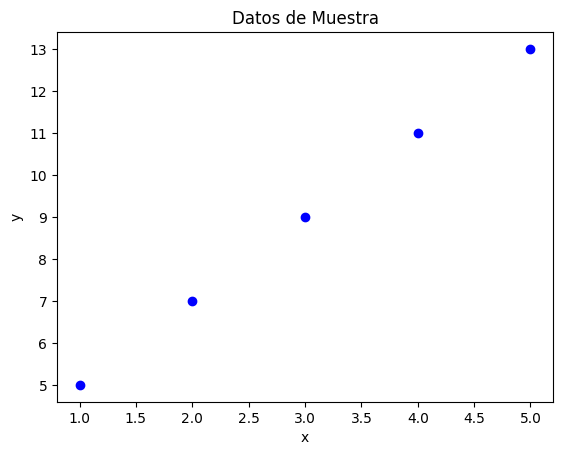

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Observaciones
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

# Graficar datos
plt.scatter(x, y, color='blue')
plt.title('Datos de Muestra')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Construcción de la Matriz de Diseño

Para un modelo lineal $y = \beta_0 + \beta_1 x$, la matriz de diseño $\mathbf{X}$ es:

$$
\mathbf{X} = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
$$

In [11]:
# Agregar una columna de unos para el término independiente
X = np.column_stack((np.ones(len(x)), x))

#### Resolviendo las Ecuaciones Normales


In [12]:
# Calcular X transpuesta X y X transpuesta y
XtX = X.T @ X
Xty = X.T @ y

# Calcular beta
beta = np.linalg.inv(XtX) @ Xty

print(f"Intersección (beta_0): {beta[0]}")
print(f"Pendiente (beta_1): {beta[1]}")

Intersección (beta_0): 3.0000000000000098
Pendiente (beta_1): 2.000000000000001


#### Graficando la Línea Ajustada

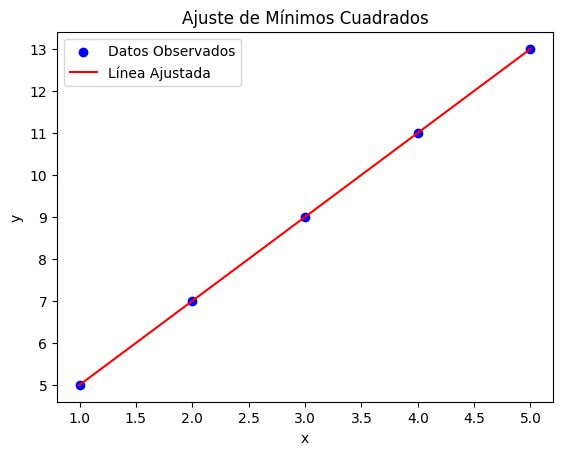

In [13]:
# Valores predichos
y_pred = X @ beta

# Graficar
plt.scatter(x, y, color='blue', label='Datos Observados')
plt.plot(x, y_pred, color='red', label='Línea Ajustada')
plt.title('Ajuste de Mínimos Cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### 2.5 Análisis de Residuos

- **Definición**: El residuo para cada observación es $ r_i = y_i - \hat{y}_i $.
- **Propósito**: Analizar los residuos ayuda a evaluar la calidad del ajuste e identificar patrones que el modelo no captura.
  
#### 2.6 Propiedades de los Estimadores de Mínimos Cuadrados

- **Insesgadez**: Bajo supuestos clásicos, los estimadores de mínimos cuadrados son insesgados.
- **Eficiencia**: Tienen la varianza más pequeña entre todos los estimadores lineales insesgados (teorema de Gauss-Markov).

### Limitaciones y Consideraciones

- **Sensibilidad a Valores Atípicos**: Los mínimos cuadrados pueden ser fuertemente influenciados por valores atípicos, lo que puede sesgar los resultados.
- **Multicolinealidad**: Cuando las variables predictoras están altamente correlacionadas, puede conducir a inestabilidad en las estimaciones de los coeficientes.


### Visualización Interactiva

Utilizar `ipywidgets` para crear deslizadores que ajusten los valores de \(\beta_0\) y \(\beta_1\) y muestren cómo cambia la línea ajustada en tiempo real.


In [15]:
from ipywidgets import interact

def plot_fit(beta_0, beta_1):
    y_pred = beta_0 + beta_1 * x
    plt.scatter(x, y, color='blue', label='Datos Observados')
    plt.plot(x, y_pred, color='red', label=f'Línea: y = {beta_0} + {beta_1}x')
    plt.title('Ajuste Interactivo de Mínimos Cuadrados')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

interact(plot_fit, beta_0=(-10, 10, 0.5), beta_1=(-5, 5, 0.1));

interactive(children=(FloatSlider(value=0.0, description='beta_0', max=10.0, min=-10.0, step=0.5), FloatSlider…

### Puntos Clave

- **Fundamento Matemático**: Entender la derivación ayuda a comprender cómo y por qué funciona el método.
- **Enfoque Computacional**: Implementar el método en código solidifica los conceptos teóricos.
- **Pensamiento Crítico**: Reconocer las limitaciones asegura una aplicación apropiada en escenarios del mundo real.
